In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [5]:
print(train_df.shape)
print(test_df.shape)


(11504798, 12)
(7669866, 11)


In [6]:
print(train_df.columns)
print(test_df.columns)


Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')
Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'],
      dtype='object')


In [7]:
train_df.head(10)


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.00,0,1-2 Year,Yes,65101.00,124.00,187,0
1,1,Male,43,1,28.00,0,> 2 Years,Yes,58911.00,26.00,288,1
2,2,Female,25,1,14.00,1,< 1 Year,No,38043.00,152.00,254,0
3,3,Female,35,1,1.00,0,1-2 Year,Yes,2630.00,156.00,76,0
4,4,Female,36,1,15.00,1,1-2 Year,No,31951.00,152.00,294,0
5,5,Female,31,1,47.00,1,< 1 Year,No,28150.00,152.00,197,0
6,6,Male,23,1,45.00,1,< 1 Year,No,27128.00,152.00,190,0
7,7,Female,47,1,8.00,0,1-2 Year,Yes,40659.00,26.00,262,1
8,8,Female,26,1,28.00,1,< 1 Year,No,31639.00,152.00,36,0
9,9,Female,66,1,11.00,0,1-2 Year,Yes,2630.00,26.00,125,0


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


In [9]:
train_df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [10]:
train_df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,11504798.00,11504798.00,11504798.00,11504798.00,11504798.00,11504798.00,11504798.00,11504798.00,11504798.00
mean,5752398.50,38.38,1.00,26.42,0.46,30461.37,112.43,163.90,0.12
std,3321149.26,14.99,0.04,12.99,0.50,16454.75,54.04,79.98,0.33
min,0.00,20.00,0.00,0.00,0.00,2630.00,1.00,10.00,0.00
25%,2876199.25,24.00,1.00,15.00,0.00,25277.00,29.00,99.00,0.00
50%,5752398.50,36.00,1.00,28.00,0.00,31824.00,151.00,166.00,0.00
75%,8628597.75,49.00,1.00,35.00,1.00,39451.00,152.00,232.00,0.00
max,11504797.00,85.00,1.00,52.00,1.00,540165.00,163.00,299.00,1.00


In [11]:
train_df = train_df.drop(['id'], axis=1)
test_df = test_df.drop(['id'], axis=1)
combine = [train_df, test_df]

In [12]:
train_df.duplicated().sum()

0

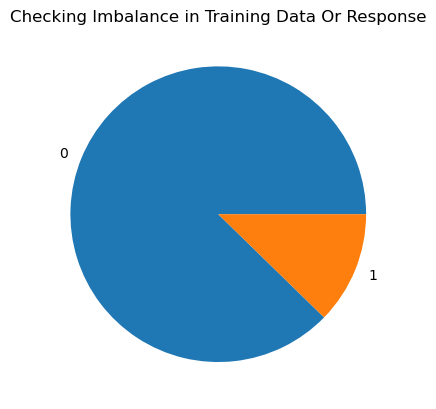

In [13]:
response_data = train_df['Response'].value_counts()
plt.pie(response_data, labels = [0,1])
plt.title('Checking Imbalance in Training Data Or Response')
plt.show()

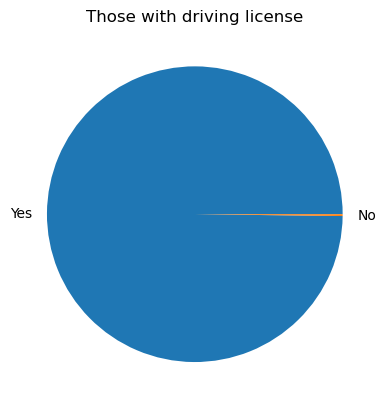

In [14]:
response_data = train_df['Driving_License'].value_counts()
plt.pie(response_data, labels = ['Yes','No'])
plt.title('Those with driving license')
plt.show()

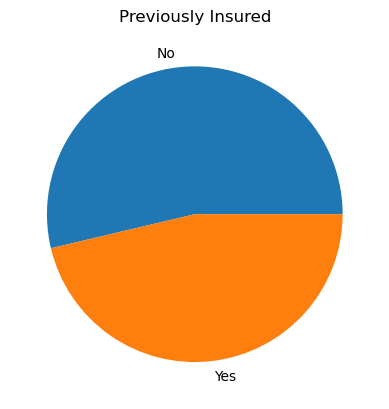

In [15]:
response_data = train_df['Previously_Insured'].value_counts()
plt.pie(response_data, labels = ['No','Yes'])
plt.title('Previously Insured')
plt.show()

In [16]:
train_df[['Driving_License', 'Response']].groupby(['Driving_License'], as_index=False).mean().sort_values(by='Response', ascending=False)

,Driving_License,Response
1,1,0.12
0,0,0.06


In [17]:
train_df[['Previously_Insured', 'Response']].groupby(['Previously_Insured'], as_index=False).mean().sort_values(by='Response', ascending=False)

,Previously_Insured,Response
0,0,0.23
1,1,0.00


In [18]:
train_df[['Region_Code', 'Response']].groupby(['Region_Code'], as_index=False).mean().sort_values(by='Response', ascending=False)

,Region_Code,Response
28,28.00,0.19
38,38.00,0.19
52,51.00,0.19
19,19.00,0.17
4,4.00,0.16
23,23.00,0.16
24,24.00,0.14
18,18.00,0.13
3,3.00,0.13
7,7.00,0.13


In [19]:
train_df[['Vehicle_Damage', 'Response']].groupby(['Vehicle_Damage'], as_index=False).mean().sort_values(by='Response', ascending=False)

,Vehicle_Damage,Response
1,Yes,0.24
0,No,0.00


In [20]:
train_df[['Vehicle_Age', 'Response']].groupby(['Vehicle_Age'], as_index=False).mean().sort_values(by='Response', ascending=False)

,Vehicle_Age,Response
2,> 2 Years,0.30
0,1-2 Year,0.18
1,< 1 Year,0.04


In [21]:
train_df[['Gender', 'Response']].groupby(['Gender'], as_index=False).mean().sort_values(by='Response', ascending=False)

,Gender,Response
1,Male,0.14
0,Female,0.10


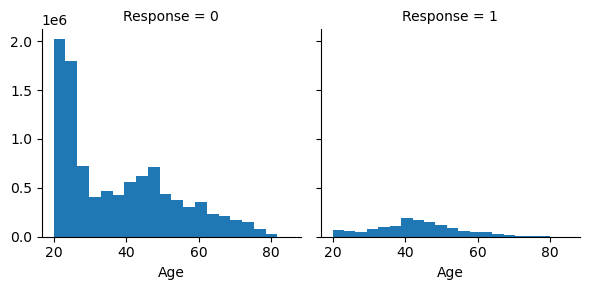

In [22]:
g = sns.FacetGrid(train_df, col='Response')
g.map(plt.hist, 'Age', bins=20)

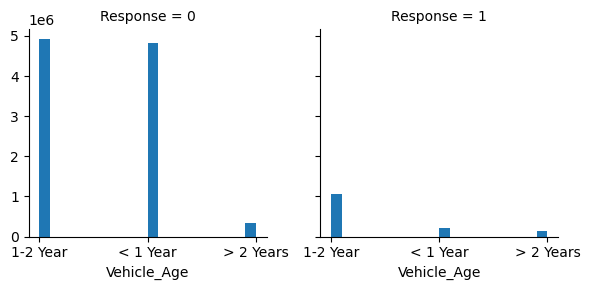

In [23]:
g = sns.FacetGrid(train_df, col='Response')
g.map(plt.hist, 'Vehicle_Age', bins=20)

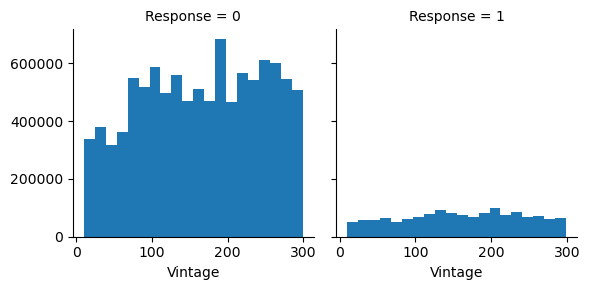

In [24]:
g = sns.FacetGrid(train_df, col='Response')
g.map(plt.hist, 'Vintage', bins=20)

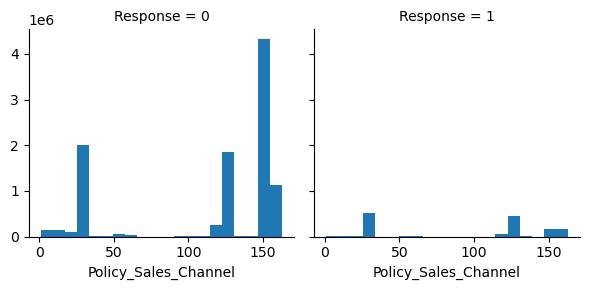

In [25]:
g = sns.FacetGrid(train_df, col='Response')
g.map(plt.hist, 'Policy_Sales_Channel', bins=20)

In [26]:
print(train_df['Vehicle_Age'].unique())

['1-2 Year' '> 2 Years' '< 1 Year']


['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],

In [27]:
train_df.dtypes

Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [28]:

gender_map={'Male':1,'Female':0}
train_df['Gender'] = train_df['Gender'].map(gender_map)
test_df['Gender'] = test_df['Gender'].map(gender_map)

va_map={'< 1 Year':0,'1-2 Year':1,'> 2 Years':2}

train_df['Vehicle_Age'] = train_df['Vehicle_Age'].map(va_map)
test_df['Vehicle_Age'] = test_df['Vehicle_Age'].map(va_map)

vd_map={'Yes':1,'No':0}

train_df['Vehicle_Damage'] = train_df['Vehicle_Damage'].map(vd_map)
test_df['Vehicle_Damage'] = test_df['Vehicle_Damage'].map(vd_map)

print(train_df.head())
print(test_df.head())

   Gender  Age  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  \
0       1   21                1        35.00                   0            1   
1       1   43                1        28.00                   0            2   
2       0   25                1        14.00                   1            0   
3       0   35                1         1.00                   0            1   
4       0   36                1        15.00                   1            1   

   Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Response  
0               1        65101.00                124.00      187         0  
1               1        58911.00                 26.00      288         1  
2               0        38043.00                152.00      254         0  
3               1         2630.00                156.00       76         0  
4               0        31951.00                152.00      294         0  
   Gender  Age  Driving_License  Region_Code  Previ

In [29]:
train_df.dtypes

Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [30]:
test_df.dtypes

Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
dtype: object

<Axes: >

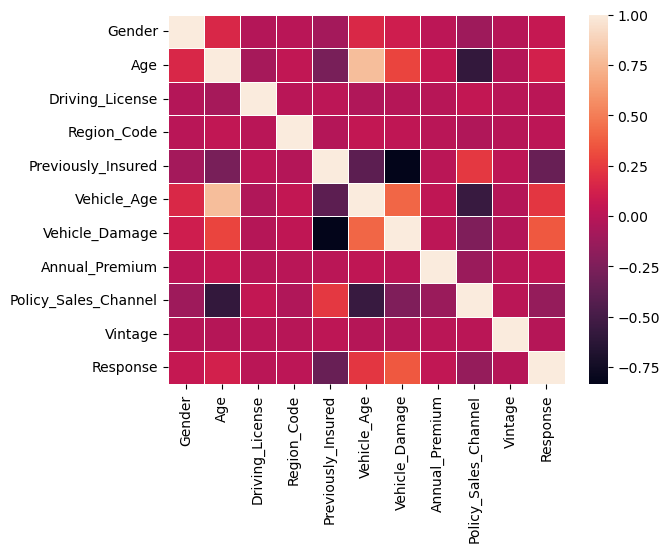

In [31]:
cor=train_df.corr()
sns.heatmap(cor,cbar=True,linewidth=0.5)

In [33]:
X_train=train_df.drop('Response',axis=1)
Y_train=train_df['Response']
X_test=test_df


In [37]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print(acc_log)

/Users/shravya/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


87.16
